# 1) One-dimensional algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from sklearn import mixture
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn import metrics
import scipy.stats as ss

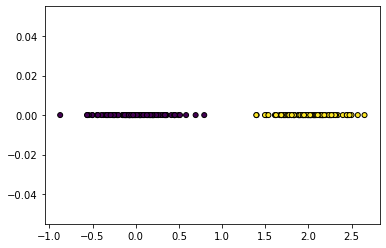

In [2]:
mu1, sigma1 = 0, 0.3 # mean and standard deviation
s1 = np.random.normal(mu1, sigma1, 100)
y1 = np.repeat(0, 100)

mu2, sigma2 = 2, 0.3 # mean and standard deviation
s2 = np.random.normal(mu2, sigma2, 100)
y2 = np.repeat(1, 100)

mu = [mu1, mu2]
sigma = [sigma1, sigma2]

data = np.concatenate([s1,s2])
y = np.concatenate([y1,y2])

y1 = np.zeros(y.shape[0])
plt.scatter(data, y1, marker='o', c=y, s=25, edgecolor='k')

In [3]:
def pr_single_comp(mu, sigma, x):
    prob = []
    for i in range(0, x.shape[0]) :
        prob.append(np.exp(-0.5*((x[i,]-mu)/sigma)**2)/sigma)
    return prob


def pr_single_normalized(mu, sigma, x):
    unnorm_prob = pr_single_comp(mu, sigma, x)
    normalization = np.sum(pr_single_comp(mu, sigma, x), axis=1)
    prob = []
    for i in range(0, len(unnorm_prob)) :
        prob.append(unnorm_prob[:][i]/normalization[i])
    return prob


def update_mu(x,mu,sigma) :
    prob = pr_single_normalized(mu,sigma,x)
    hat_mu = [0, 0]
    for i in range(0, len(prob)):
        hat_mu = hat_mu + prob[i][:]*x[i,]
    hat_mu = hat_mu/np.sum(pr_single_normalized(mu, sigma, x), axis=0)
    return hat_mu


def update_sigma(x,mu,sigma) :
    prob = pr_single_normalized(mu,sigma,x)
    hat_sigma = [0, 0]
    for i in range(0, len(prob)):
        hat_sigma = hat_sigma + prob[i][:]*(x[i,] - mu)**2
    hat_sigma = hat_sigma/np.sum(pr_single_normalized(mu, sigma, x), axis=0)
    return hat_sigma

In [4]:
mu_old = [random.uniform(-2, 2), random.uniform(0, 4)]
sigma_old = [0.3, 0.3]
NbIter = 10

In [5]:
# Learning procedure (optimization)
for iter in range(1, NbIter):
    hat_mu = update_mu(data,mu_old,sigma_old)
    hat_sigma = update_sigma(data,mu_old,sigma_old)
    print('iter', iter)
    print('updated mu = ', hat_mu)
    print('updated sigma = ', hat_sigma)
    mu_old = hat_mu
    sigma_old = hat_sigma + 1e-13

iter 1
updated mu =  [-0.25557741  1.35283072]
updated sigma =  [1.3135663  0.80764321]
iter 2
updated mu =  [0.33769339 1.50651448]
updated sigma =  [1.07631309 0.78108056]
iter 3
updated mu =  [0.39058573 1.63249163]
updated sigma =  [0.75540301 0.64746637]
iter 4
updated mu =  [0.17414597 1.88120523]
updated sigma =  [0.46029486 0.34627912]
iter 5
updated mu =  [0.00220047 1.99889457]
updated sigma =  [0.12399891 0.08359012]
iter 6
updated mu =  [-1.75048176e-03  1.99809533e+00]
updated sigma =  [0.0882902  0.06964854]
iter 7
updated mu =  [-1.75048176e-03  1.99809533e+00]
updated sigma =  [0.08827459 0.0696479 ]
iter 8
updated mu =  [-1.75048176e-03  1.99809533e+00]
updated sigma =  [0.08827459 0.0696479 ]
iter 9
updated mu =  [-1.75048176e-03  1.99809533e+00]
updated sigma =  [0.08827459 0.0696479 ]


### Conclusion

We just tested the one-dimensionnal case on the simulated data and the estimated means and variance correspond to the initial data. After only 10 iterations, the relative errors are very small. Besides, if we multiply the true values of the standard deviations (0.3) by themselves (meaning 0.09), we nearly obtain the estimated variance with also very small relative errors. We note that the algorithm sometimes converges to false mean values.

# 2) Two dimensional algorithm

## 2.1) Self implementation

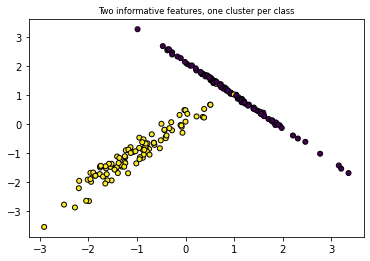

In [6]:
# First simulated data set
plt.title("Two informative features, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=25, edgecolor='k')
plt.show()

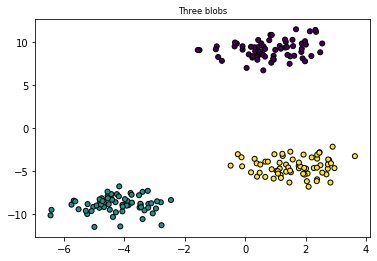

In [7]:
# Second simulated data set
plt.title("Three blobs", fontsize='small')
X2, Y2 = make_blobs(n_samples=200, n_features=2, centers=3)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2, s=25, edgecolor='k')
plt.show()

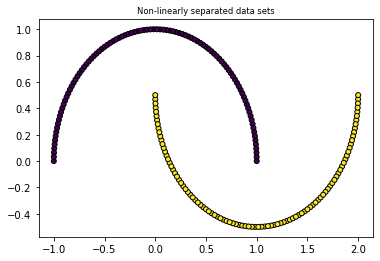

In [8]:
# Third simulated data set
plt.title("Non-linearly separated data sets", fontsize='small')
X3, Y3 = make_moons(n_samples=200, shuffle=True, noise=None, random_state=None)
plt.scatter(X3[:, 0], X3[:, 1], marker='o', c=Y3, s=25, edgecolor='k')
plt.show()

In [9]:
def pr_single_comp(mu, sigma, x):
    prob = []
    for i in range(0, x.shape[0]):
        p = np.zeros(2)
        for j in range(2):
            m = mu[j]
            s = sigma[j]
            invs = np.linalg.inv(s)
            invs2 = np.dot(invs, invs)
            det = np.linalg.det(s)
            A = -0.5 * np.dot(x[i,j]-m, invs2)
            B = np.dot(A, (x[i,j]-m).T)
            p[j]= 1/np.sqrt(det) * B
        prob.append(p)
    return prob


def pr_single_normalized(mu, sigma, x):
    unnorm_prob = pr_single_comp(mu, sigma, x)
    normalization = np.sum(pr_single_comp(mu, sigma, x), axis=1)
    prob = []
    for i in range(0, len(unnorm_prob)) :
        prob.append(unnorm_prob[:][i]/normalization[i])
    return prob


def update_mu(x, mu, sigma) :
    prob = pr_single_normalized(mu,sigma,x)
    hat_mu = [np.zeros(2), np.zeros(2)]

    for i in range(0, len(prob)):
        for j in range(2):
            hat_mu[j] += prob[i][j]*x[i]
    
    somme = np.sum(pr_single_normalized(mu, sigma, x), axis=0)
    for j in range(2):
        hat_mu[j] = hat_mu[j] / somme[j]
    return hat_mu


def update_sigma(x, mu, sigma) :
    prob = pr_single_normalized(mu, sigma, x)
    hat_sigma = [np.zeros((2,2)), np.zeros((2,2))]
    
    for i in range(0, len(prob)):
        for j in range(2):
            hat_sigma[j] += prob[i][j] * np.outer(x[i]-mu[j], (x[i]-mu[j]))
    
    somme = np.sum(pr_single_normalized(mu, sigma, x), axis=0)
    for j in range(2):
        hat_sigma[j] = hat_sigma[j] / somme[j]
    return hat_sigma

In [10]:
mu1 = np.array([0,0])
mu2 = np.array([1,1])
mu_old = [mu1, mu2]

sigma1 = np.array([[1, 0.5], [0.5, 1]])
sigma2 = np.array([[1, 0.3], [0.3, 1]])
sigma_old = [sigma1, sigma2]

NbIter = 10

X = X1

# Learning procedure (optimization)
for iter in range(1, NbIter):
    hat_mu = update_mu(X, mu_old, sigma_old)
    hat_sigma = update_sigma(X, mu_old, sigma_old)
    print('iter', iter)
    print('updated mu = ', hat_mu)
    print('updated sigma = ', hat_sigma)
    mu_old = hat_mu
    for j in range(2):
        hat_sigma[j] = hat_sigma[j] + 1e-13
    sigma_old = hat_sigma

iter 1
updated mu =  [array([0.67684764, 0.32826425]), array([-0.53242173, -0.23173704])]
updated sigma =  [array([[1.87755116, 0.86555086],
       [0.86555086, 1.28332796]]), array([[3.45593733, 2.80806595],
       [2.80806595, 3.64183184]])]
iter 2
updated mu =  [array([-0.10842689, -0.29669645]), array([0.23981277, 1.04547611])]
updated sigma =  [array([[2.47653277, 1.54373099],
       [1.54373099, 1.9550967 ]]), array([[1.14970117, 1.30043282],
       [1.30043282, 2.89109588]])]
iter 3
updated mu =  [array([ 0.67071699, -0.32328917]), array([-0.16377691,  0.06132088])]
updated sigma =  [array([[3.0434279 , 0.64937954],
       [0.64937954, 0.94142165]]), array([[1.4847596 , 1.47469761],
       [1.47469761, 2.91606879]])]
iter 4
updated mu =  [array([ 0.11672569, -0.19280954]), array([-0.30621658,  0.35867597])]
updated sigma =  [array([[2.15006599, 0.86924224],
       [0.86924224, 1.28745715]]), array([[1.0289794 , 1.13210693],
       [1.13210693, 2.69503699]])]
iter 5
updated mu = 

### Conclusion

We adapted the given functions to deal with two-dimensional data, especially the three generic distributions presented in the last practical work. However, we notice the convergence is reached only in a part of the different experiments made. There may be some issue in my code I couldn't find. Yet, I noticed that for particular distributions, the obtained results correspond to the true data with a fast convergence. (I implemented the code for two clusters only but it is easily generalisable to more).

## 2.2) Sklearn Gaussian Mixture

### 2.2.1) Three generic datasets

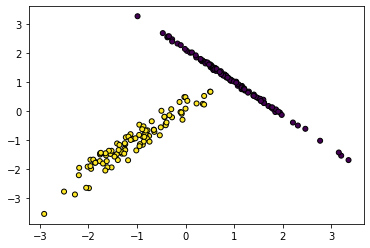

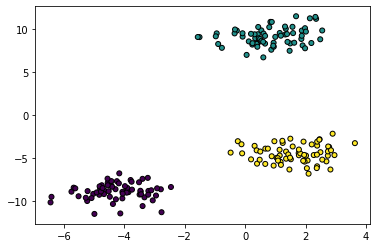

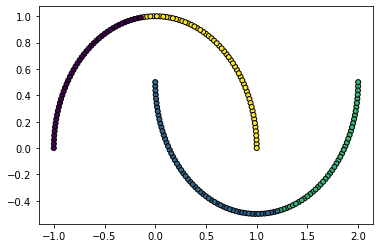

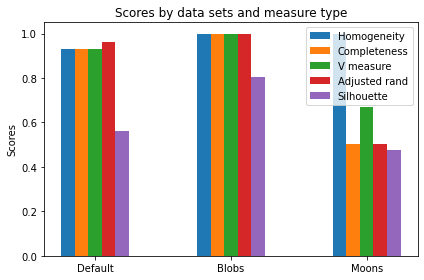

In [11]:
homogeneity_means = []
completeness_means = []
v_measure_means = []
adjusted_means = []
silhouette_means = []

data = [(X1, Y1), (X2, Y2), (X3, Y3)]

for (X, Y) in data :
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 5)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components, covariance_type=cv_type)
            gmm.fit(X)
            bic.append(gmm.bic(X))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm

    y_predicted = best_gmm.predict(X)

    plt.scatter(X[:, 0], X[:, 1], marker='o', c=y_predicted, s=25, edgecolor='k')
    plt.show()
    
    homogeneity_means.append(metrics.homogeneity_score(Y, y_predicted))
    completeness_means.append(metrics.completeness_score(Y, y_predicted))
    v_measure_means.append(metrics.v_measure_score(Y, y_predicted))
    adjusted_means.append(metrics.adjusted_rand_score(Y, y_predicted))
    silhouette_means.append(metrics.silhouette_score(X, y_predicted))


# Plot
labels = ['Default', 'Blobs', 'Moons']

x = np.arange(len(labels)) 
width = 0.10 

fig, ax = plt.subplots()
rects2 = ax.bar(x - 2*width, homogeneity_means, width, label='Homogeneity')
rects3 = ax.bar(x - width , completeness_means, width, label='Completeness')
rects4 = ax.bar(x , v_measure_means, width, label='V measure')
rects5 = ax.bar(x + width, adjusted_means, width, label='Adjusted rand')
rects6 = ax.bar(x + 2*width, silhouette_means, width, label='Silhouette')

ax.set_ylabel('Scores')
ax.set_title('Scores by data sets and measure type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc = 'upper right')
fig.tight_layout()
plt.show()

### Conclusion 

The results are quite expected but very interesting. We can see that on the two first distributions, the true number of clusters is well estimated by the algorithm and the obtained clusters present very good metric scores (especially in the second distribution for which no error is made, because the clusters are well separated). However, for the last distribution, the hypothesis of modelizing the cluster distributions by gaussian distributions isn't relevant anymore and the results are illustrating this. Indeed, the algorithm tries to fit in gaussian distribution to the data and the optimal result is obtained with 4 clusters (among 1 to 5). We can easily imagine how the algorithm sees these four clusters with the resulting plot, as well as why it has difficulties modelizing the data by two gaussian distributions only.

## 2.2.2) Mice and Breast Cancer datasets

Ranking of BICs for each cv type and each number of components for Breast Cancer Data :
spherical :
[9. 8. 7. 6. 5. 4. 3. 2. 1.]
tied :
[9. 8. 7. 3. 4. 5. 6. 2. 1.]
diag :
[9. 8. 7. 6. 5. 4. 3. 2. 1.]
full :
[5. 1. 2. 3. 4. 6. 7. 8. 9.]


The best number of components for Breast Cancer data is 2 while the true number of clusters is 2.


Ranking of BICs for each cv type and each number of components for Mice Data :
spherical :
[9. 8. 7. 6. 5. 4. 3. 2. 1.]
tied :
[9. 6. 8. 7. 5. 4. 3. 1. 2.]
diag :
[9. 8. 7. 6. 5. 4. 3. 2. 1.]
full :
[5. 1. 2. 3. 4. 6. 7. 8. 9.]


The best number of components for Mice data is 2 while the true number of clusters is 8.




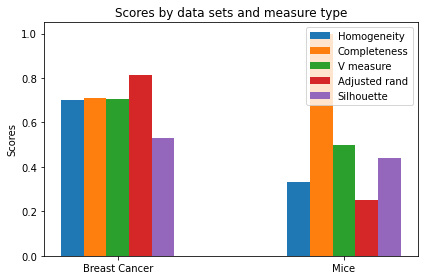

In [12]:
# Breast Cancer data
 
data = pd.read_table('BreastDiagnostic.txt', sep=',',header=None)
X1, Y1 = data.iloc[:, 2:], data.iloc[:, 1]

Y1 = Y1.replace('M', 1)
Y1 = Y1.replace('B', 0)

# Mice Data

data = pd.read_table('Mice.txt', sep='\t',header=None)
X, Y = data.iloc[1:, 2:-1], data.iloc[1:, -1]

X = X.fillna(0)

X.iloc[:,76] = X.iloc[:,76].replace('Control',0)
X.iloc[:,76] = X.iloc[:,76].replace('Ts65Dn',1)
X.iloc[:,77] = X.iloc[:,77].replace('Memantine',0)
X.iloc[:,77] = X.iloc[:,77].replace('Saline',1)
X.iloc[:,78] = X.iloc[:,78].replace('C/S',0)
X.iloc[:,78] = X.iloc[:,78].replace('S/C',4)

Y = Y.replace('c-CS-m', 1)
Y = Y.replace('c-SC-m', 2)
Y = Y.replace('c-CS-s', 3)
Y = Y.replace('c-SC-s', 4)
Y = Y.replace('t-CS-m', 5)
Y = Y.replace('t-SC-m', 6)
Y = Y.replace('t-CS-s', 7)
Y = Y.replace('t-SC-s', 8)

Y = pd.to_numeric(Y)

homogeneity_means = []
completeness_means = []
v_measure_means = []
adjusted_means = []
silhouette_means = []

data = [(X1, Y1), (X, Y)]

i = 0
for (X, Y) in data :
    j = 0
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 10)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    if i == 0:
        print("Ranking of BICs for each cv type and each number of components for Breast Cancer Data :")
    if i == 1:
        print("Ranking of BICs for each cv type and each number of components for Mice Data :")
    
    for cv_type in cv_types:
        print(str(cv_type) + " :")
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components, covariance_type=cv_type)
            gmm.fit(X)
            bic.append(gmm.bic(X))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm
        z = bic[0+j*9 : 10+j*9]
        print(ss.rankdata(z))
        j += 1
        
    b = best_gmm.n_components

    y_predicted = best_gmm.predict(X)

    homogeneity_means.append(metrics.homogeneity_score(Y, y_predicted))
    completeness_means.append(metrics.completeness_score(Y, y_predicted))
    v_measure_means.append(metrics.v_measure_score(Y, y_predicted))
    adjusted_means.append(metrics.adjusted_rand_score(Y, y_predicted))
    silhouette_means.append(metrics.silhouette_score(X, y_predicted))
    
    print('\n')
    if i == 0:
        print("The best number of components for Breast Cancer data is " + str(b) + " while the true number of clusters is 2.")
    if i == 1:
        print("The best number of components for Mice data is " + str(b) + " while the true number of clusters is 8.")
    print('\n')
    i+=1
    
    
# Plot
labels = ['Breast Cancer', 'Mice']

x = np.arange(len(labels)) 
width = 0.10 

fig, ax = plt.subplots()
rects2 = ax.bar(x - 2*width, homogeneity_means, width, label='Homogeneity')
rects3 = ax.bar(x - width , completeness_means, width, label='Completeness')
rects4 = ax.bar(x , v_measure_means, width, label='V measure')
rects5 = ax.bar(x + width, adjusted_means, width, label='Adjusted rand')
rects6 = ax.bar(x + 2*width, silhouette_means, width, label='Silhouette')

ax.set_ylabel('Scores')
ax.set_title('Scores by data sets and measure type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc = 'upper right')
fig.tight_layout()
plt.show()

### Conclusion

We tested the same algorithm on the breast cancer and mice datasets. The results are also very illustrative of the algorithm behavior as it has a lot more difficulties dealing with the breast cancer dataset than with the mice dataset. Indeed, the estimated optimal number of clusters (between 1 and 10) is 2 for both datasets, while the true values are respectively 2 and 8. This means the algorithm sees the mice data distribution as 2 gaussian distributions rather than 8. Besides, we also displayed the BICs values ranking for each covariance type and each number of components (1 corresponding to the lowest BIC value among the 9 values, i.e. the best number of components for this particular covariance type). What it shows is a tendency for spherical tied and diag covariances to improve with an increasing number of components. We can notice that the BIC values associated with 2 components for these three covariance types and the breast cancer dataset is nearly the worst one, meaning these gaussian distribution types doesn't well apprehend the data distribution at all. On the contrary and following what we just stated, because the true number of clusters in the mice dataset is 8, these three covariance types present good BIC values for 8 components. Yet, the best BIC value is obtained by the full covariance type with two components, which is a bad estimation considering the true number of clusters of our problem. This error is illustrated by the different bad metric scores showed on the graph for the mice dataset. The best BIC value for the breast cancer dataset is also obtained by the full covariance types with two components : the true value. The obtained metric scores are descent but not excellent. 

This practical work helped a lot illustrating the behaviour of the expectation-maximization algorithm, as well as the distribution of breast and mice datasets thanks to the different covariance types that represent different specificities of gaussian distributions. Some distributions were really well apprehended while other ones created bad results. The EM algorithm seems to work well when the hypothesis of gaussian distributed clusters is relevant, which is an expected observation. In addition, because the decision boundaries of the algorithm are linear, it has difficulties dealing with some non linearly separated data distributions such as moon distributions. Moreover, we could observe that the results in high dimensions aren't as good as in small ones. Yet, this may also be due to the differences between the data distributions we studied, because the more the data is well separated, the more the algorithm performs well. 